In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/Users/siddesh/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
"""
1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

 Build a simple linear regression model by performing EDA 
 and do necessary transformations and select the best model using R or Python.
"""

'\n1) Delivery_time -> Predict delivery time using sorting time \n2) Salary_hike -> Build a prediction model for Salary_hike\n\n------------------------------------------------------------\n\n Build a simple linear regression model by performing EDA \n and do necessary transformations and select the best model using R or Python.\n'

## Question 1

In [3]:
salary_data = pd.read_csv("Salary_Data.csv")

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Text(0, 0.5, 'Salary')

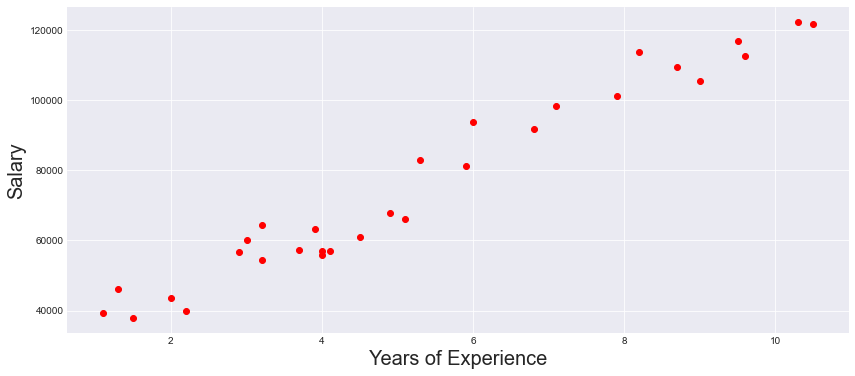

In [6]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(salary_data["YearsExperience"],salary_data["Salary"],color = "red")
plt.xlabel("Years of Experience",size = 20)
plt.ylabel("Salary",size = 20)

In [7]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
model = LinearRegression()
model.fit(salary_data[["YearsExperience"]],salary_data["Salary"])

LinearRegression()

In [9]:
yhat = model.predict(salary_data[["YearsExperience"]])

In [10]:
yhat

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

Text(0, 0.5, 'Salary')

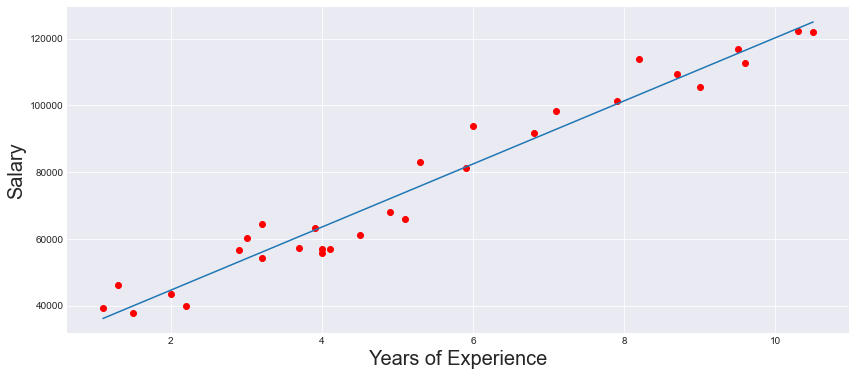

In [12]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(salary_data["YearsExperience"],salary_data["Salary"],color = "red")
plt.plot(salary_data["YearsExperience"],yhat)
plt.xlabel("Years of Experience",size = 20)
plt.ylabel("Salary",size = 20)

In [13]:
model.intercept_

25792.20019866871

In [14]:
model.coef_

array([9449.96232146])

In [15]:
#yhat = 9449.9X + 25792.2

In [16]:
r2_score(salary_data["Salary"],yhat)

0.9569566641435086

In [17]:
import statsmodels.formula.api as smf

In [18]:
model = smf.ols("YearsExperience~Salary",data=salary_data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        11:33:42   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x = salary_data.drop('Salary',axis = 1).values

##  Question 2

In [12]:
delivery_data = pd.read_csv("delivery_time.csv")

In [13]:
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [15]:
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [16]:
model_2 = LinearRegression()
model_2.fit(delivery_data[["Sorting Time"]],delivery_data["Delivery Time"])

LinearRegression()

In [17]:
yhat_2 = model_2.predict(delivery_data[["Sorting Time"]])

Text(0, 0.5, 'Delivery time')

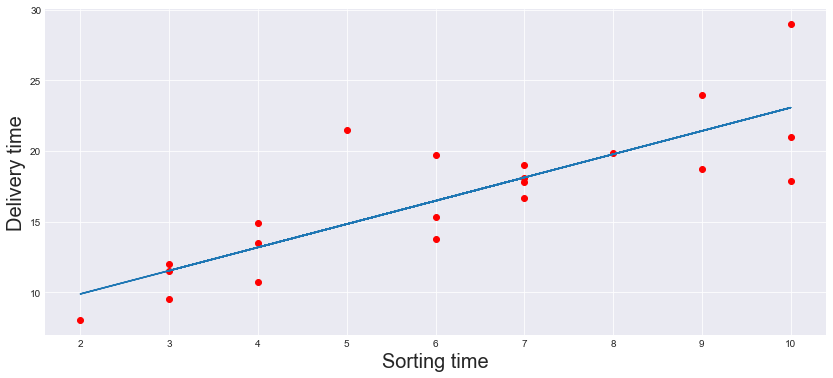

In [18]:
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(delivery_data["Sorting Time"],delivery_data["Delivery Time"],color = "red")
plt.plot(delivery_data["Sorting Time"],yhat_2)
plt.xlabel("Sorting time",size = 20)
plt.ylabel("Delivery time",size = 20)

In [20]:
yhat_2

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])